# SWAT Text Mining RNN

The data set **CFPB_COMPLAINTS** was obtained from the Consumer Financial Protection Bureau (https://www.consumerfinance.gov/data-research/consumer-complaints/). It contains complaints filed by consumers and a binary indicator indicating if the consumer disputed the company's response to the claim. The goal of this analysis is first to analyze the raw unstructured text and then build a model to predict when a consumer will dispute the company's response from the complaint. 

| Name      | Model Role | Measurement Level | Description                                                            |
|:----------|:-----------|:------------------|:-----------------------------------------------------------------------|
| DISPUTE   | Target     | Binary            | 1 = consumer disputed company response, 0 = did not dispute            |
| COMPLAINT | Input      | Text              | consumer submitted complaint                                           |

# Load Packages

In [1]:
import swat
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
swat.options.cas.print_messages = True

# Connect to CAS

In [2]:
conn = swat.CAS("server.demo.sas.com", 30570, "christine", "Student1")

# Load Data onto the Server

In [3]:
uptab = conn.upload("data/cfpb_complaints.sas7bdat", casout = dict(name="cfpb", replace=True))
indata = 'cfpb'
castbl = conn.CASTable(name = indata)

NOTE: Cloud Analytic Services made the uploaded file available as table CFPB in caslib CASUSER(christine).
NOTE: The table CFPB has been created in caslib CASUSER(christine) from binary data uploaded to Cloud Analytic Services.


In [4]:
display(castbl.shape)
pd.options.display.max_colwidth=10000
castbl.head(2)

(10000, 2)

,dispute,complaint
0,0.0,I am a homeownership advisor with XXXX. On XXXX/15 I submitted an XXXX to SLS and received fax confirmation. I called today to check its status and was told that it had not been received.
1,0.0,I Want to file a complaint about XXXX For Foreclosing wrongly on me and my familys only home we had and loved! XXXX ruined our life 's and we have been XXXX ever since they wrongly foreclosed on me during a loan modification I was almost done with and approved for! Its been almost 3 years since XXXX took our home and all I received from the lawsuit was XXXX. Thats not even a mortgage payment! How is this fair or rite at all!? XXXX should have to give us back our homes or help us get new ones since they were wrong and took everything from us we worked so hard to get!


# Quick Clean

In [5]:
conn.loadActionSet('dataStep')
actions = conn.builtins.help(actionSet='dataStep')

NOTE: Added action set 'dataStep'.
NOTE: Information for action set 'dataStep':
NOTE:    dataStep
NOTE:       runCodeTable - Runs DATA step code stored in a CAS table
NOTE:       runCode - Runs DATA step code


In [6]:
conn.dataStep.runCode(code=
    '''
    data cfpb;
        set cfpb;
        complaint = lowcase(compress(complaint,'ABCDEFGHIJKLMNOPQRSTUVWXYZ.!?1234567890 ', 'ki'));
        complaint = tranwrd(complaint, ' xxxx', '');
        docid + 1;
    run;
    '''
)

conn.table.fetch(table='cfpb', to=5)

,dispute,complaint,docid
0,0.0,i am a homeownership advisor with . on 15 i submitted an to sls and received fax confirmation. i called today to check its status and was told that it had not been received.,1.0
1,0.0,i want to file a complaint about for foreclosing wrongly on me and my familys only home we had and loved! ruined our life s and we have been ever since they wrongly foreclosed on me during a loan modification i was almost done with and approved for! its been almost 3 years since took our home and all i received from the lawsuit was . thats not even a mortgage payment! how is this fair or rite at all!? should have to give us back our homes or help us get new ones since they were wrong and took everything from us we worked so hard to get!,2.0
2,0.0,i live in my former mortgage holder went bankrupt and sold our loan to green tree. prior to the sell i had never heard of this company. as a result of the sell green tree opened an escrow account to pay property taxes and insurance i never had a escrow account before and do not believe the state of requires lenders to maintain an escrow account. my mortgage is a fixed rate 30 year mortgage and the monthly mortgage payment is 1200.00 and i pay monthly to cover the escrow payment for property taxes and insurance. according to my monthly statement from green tree my regular monthly payment is 1500.00 so i pay roughly 11.00 per month more than is required which i acknowledge was no designated to be applied to the escrow account until i recently made my payment. despite my attempts to comply with the terms of this loan every year since green tree has held our mortgage we get a bill for of dollars this year it was 800.00 supposedly because of escrow shortages. every year it s a different amount but the escrow shortages are always for of dollars and the amount of insurance and property taxes we pay annually does not increase that much to justify these increases of of dollars each year. green tree provides this annual escrow account disclosure statement with this convoluted calculation to justify these increases copy attached . this year days prior to receiving the annual escrow account disclosure statement we received a letter from green tree stating that our account was current copy attached . each year i contact green tree to get someone to explain these calculations and i have yet to understand the justification or the explanation. if you do nt pay the amount of the shortage green tree threatens to increase the amount of your regular monthly payment to cover the shortage. i find it hard to believe it is legal for a mortgage company to charge a borrower of dollars more per year to maintain an escrow account if it s cheaper for the borrower to pay their own property taxes and insurance. if the borrower s property taxes and insurance are not delinquent then a borrower should be able to opt out of such a onerous escrow arrangement. if green tree is able to charge people of dollars more each year for these supposed escrow shortages it s no wonder they require borrowers to have an escrow account. we should be able to pay our own property taxes and insurance to avoid the financial hardship that green tree is creating. we are currently stuck with this mortgage company but at the first opportunity we will make every effort to change lenders. but i do nt believe we should be penalized because we are stuck with this company. a company we did not voluntarily enter into a contract with. it should not be legal for a mortgage company to require consumers to have an escrow account that costs them hundreds of dollars more per year than it would cost if that paid their own property taxes and insurance. i do nt know if this practice is legal but it should nt be and it definitely needs to be investigated.,3.0
3,0.0,my wife i had a fha backed yr serviced by signed in . we filed for chapter bankruptcy protection in including our mortgage in the filing. all mortgage payments arrearages were being ser

# Look for Specific Terms

In [7]:
debt = conn.dataStep.runCode(code=
    '''
    data debt (drop=newvar);
        set cfpb;
        newvar = find(complaint,'debt','i');
        if newvar > 0;
    run;
    '''
)

display(conn.table.recordCount(table='debt'))
conn.table.fetch(table='debt', to=5)

,N
0,938


,dispute,complaint,docid
0,0.0,xxxx is 30 days behind on mortgage payoffs. requests have been made by myself via phone and their website on 15 15 15 and by the title company doing our closing i do not have the dates they requested payoff . website states 3 days for payoff phone states to days but when i spoke to a representative today he stated they are at least 30 days behind as a result we can not close on the house and the may back out. multiple websites reflect poor reviews on payoff requests. on top of that is a debt collector not a mortgage servicer and they treat you as such regardless if you make your payment on and pay more than what is required. by far the worst company could have chosen to service their loans!,37.0
1,0.0,i just found out that my name was primary on mortgage loan for at sc with owcen financial that was awarded to my es wife. a quick claim deed was to be record with the divorce agreement which give her ownership of property 100 . this property went into foreclosure this month 2015 after being 9 months in rear. 9 months ago my ex wife purchase another property. her loan to value ratio would allow her to purchase another property with debt of the first property. after talk with i was the of contact for first property but. i dont own the property anymore. i strong believe that my is on document release her from debt to purchase another property and clear her from the first property. i have made complaint with sc i have inform the fraud department at owcen and of my concern due to quick claim deed not being filed record and attach to note. there has been some fraud in the purchase and with debt being left on me.,47.0
2,0.0,i had a mortgage with acct. which was sold to acct . in they force placed insurance on my account and for years i sent that i had had proof of insurance and they kept misapplying my payments towards escrow shortage rather than my mortgage charging late fees. finally in i spoke to someone with some sense and they mailed a check to me for theforce placed insurance. since in the interim they had sold th loan to when they sold the loan they transferred the incorrect amount. therefore when i would send my payments to they kept returning them to me stating the payment was not enough to cover the debt. sent the reimbursement check made out to and they still returned the check to me stating it was nt enough. i finally thought that this nightmare was over last year but it has continued to be an ongoing nightmare and my account keeps accumulating late fees my payments continue being returned with them stating it is not enough to cover the debt. i have had to hire an attorney who also gets the run around. i have contacted the attorney for and even he can not get an answer from . caliber states that they can not waive the previous late fees and misapplied funds because that it what was sent to them by . what i need1 to correct the misapplied payments remove the late fees update the credit bureau and report the correct balance to . 2 to waive the late fees update my credit bureau apply the escrow credit balance and accept my payments for all of the payments that i have sent have returned to me. i have this amount in my account and just want this nightmare to be over.,57.0
3,0.0,i m a with a very serious mortgage problem. i ll try to explain the best i can. i bought my primary residence in back in of through an interest only adjustable rate mortgage loan granted by the extinct acquired by . at that i was working in and could afford that type of loan until the crashed and i was out of the and immerse in debts. then i started working for a local loan modification office and with that office i could get an initial modification of my note. everything was running smoothly with my mortgage payment until the senate bill 94 that force that company i was working for to close door which left me without income again. i do not have to say i was behind in my mortgage for several months for a and looking for jobs 

In [8]:
lawyer = conn.dataStep.runCode(code=
    '''
    data lawyer (drop=newvar);
        set cfpb;
        newvar = find(complaint,'lawyer','i');
        if newvar>0;
    run;
    '''
)

display(conn.table.recordCount(table='lawyer'))
conn.table.fetch(table='lawyer', to=5)

,N
0,427


,dispute,complaint,docid
0,0.0,cmpny4785 loan i my account representative is nt very reachable. i have called and emailed several times without receiving a timely response. ii i have been asking to fill out the mortgage application two times and there is nt a clear log of the information that i sent in. iii the review process is nt complete and the list of open items keeps on changing from week to week. i nt get a final list of missing documents. a. i was told on that they need more documents to complete the loan process i sent them in on the same day. b. on i was told that the reviewers are still missing difference documents i emailed the information on . the review process still wasnt final c. on i received another request for different documents iv my reinstatement loan balance keeps on changing because of the delays above. i m seeing more legal fees assess to the account v while i m applying for a loan modification a sheriff was sent to the property to give my tenant 20 days to vacate the property on 2015 the load modification is being delayed while the lawyers are pushing forward the foreclose process.,35.0
1,0.0,my name is . my wife is at assisted me in obtaining a home loan modification from should remember me because i am the one that sent her a note to me from for my service. my loan was through the modification was loan number the mers number is i first wrote she referenced me to although had one of her aids stay on top of everything. the modification took effect on . since that day we have had our mortgage payments taken directly from our checking account when my va is deposited as of we have completed the first years not one hour late. out of no where stated we do not have a modification. sorry for the word put us through pure for the past years. they can not foreclose because our payment has not been a day late. shows on all credit bureau reports we bankrupted the loan and have not made a payment since pure lie. i sent a next day package to at the financial protection agency at the tracking shows undeliverable address this was the address i was given by your operator when she stated the normal location was under modernazation. because of i have been hospitalized am literally what my division name said the walking dead . has destroyed our credit my health and a lot more. they refuse to correct the credit bureau reports stating we bankrupted this is true although it was at instructions the federal judge refused to sign ant reaffirmation s or the modification in . we reopened the case in in an attempt to get the reaffirmation and modification signed at a cost of 7000.00 the new judge had a fit we waited years and refused to sign the reaffirmation also. the judge stated it was not required for a modification. he is correct. i need a correct address to resend the entire package to who did save my life. has refused to speak with us denied the modificationh had me fax my copy finally on to at fax . we are trying to refinance using my va the credit report is hampering that although i have sent a copy of every payment receipt to the various refinance banks. please in gon s name help i am yearsold totally and followed every rule on the modification when the bankruptcy court discharged 6900.00. from i than did not take any action left it in the modification. i have spoken with lawyers wanted a class action i do not another wanted to sue for damages sighting a law suit i just want the facts of this issue corrected. please email me your correct address . why i can never forget her for her help that will not be destroyed i kept her letter and it took my son to tell me to her name and thank i found her.,38.0
2,0.0,im waiting on approval for the sale of my current home while i m packed up have utilities already transferred already spent 3500.00 in repairs to this home the buyer had been approved twice and it s stuck in underwriting. i m without cable been eating out since everything is boxed and my life is upside down. i ve even 

# Parse Documents

In [9]:
conn.loadActionSet('textParse')
actions = conn.builtins.help(actionSet='textParse')

NOTE: Added action set 'textParse'.
NOTE: Information for action set 'textParse':
NOTE:    textParse
NOTE:       tpParse - Parses text using Natural Language Processing (NLP) techniques. This action requires a SAS Visual Text Analytics license or a SAS Visual Data Mining and Machine Learning license
NOTE:       tpAccumulate - Accumulates parsing results and generates parent and terms tables. This action requires a SAS Visual Text Analytics license or a SAS Visual Data Mining and Machine Learning license
NOTE:       tpSpell - Checks the output of the tpParse action and refines the parent spelling results for a term. This action requires a SAS Visual Text Analytics license
NOTE:       tpWordVector - Applies a word vector model to score documents. This action requires a SAS Visual Text Analytics license
NOTE:       applyWordVector - Applies a word vector model to score documents. This action requires a SAS Visual Text Analytics license


In [10]:
conn.textParse.tpParse(
    table = indata,
    docid = 'docid',
    text = 'complaint',
    stemming = True,
    nounGroups = False,
    entities = 'none',
    tagging = False,
    parseConfig = dict(name='config', replace=True),
    offset = dict(name='offset', replace=True)
)

,casLib,Name,Label,Rows,Columns,casTable
0,CASUSER(christine),offset,,2408801,9,"CASTable('offset', caslib='CASUSER(christine)')"
1,CASUSER(christine),config,,1,20,"CASTable('config', caslib='CASUSER(christine)')"


In [11]:
display(conn.table.fetch(table='config'))
conn.table.fetch(table='offset', to=5)

,_Language_,_Stemming_,_Tagging_,_NounGroup_,_Entities_,_CellWeight_,_Multiterm_,_MultitermCaslib_,_LITI_,_LITICaslib_,_DefaultEntitiesPriority_,_SelectPos_,_SelectPosList_,_SelectAttribute_,_SelectAttributeList_,_SelectEntity_,_SelectEntityList_,_PredefinedMultiterm_,_ComplexTag_,_MultitermCaseInsensitive_
0,English,Y,N,N,N,LOG,,,,,1.0,,,,,,,Y,N,N


,_Term_,_Role_,_Attribute_,_Parent_,_Start_,_End_,_Sentence_,_Paragraph_,_Document_
0,i,,1.0,i,0.0,0.0,1.0,0.0,1.0
1,am,,1.0,be,2.0,3.0,1.0,0.0,1.0
2,a,,1.0,a,5.0,5.0,1.0,0.0,1.0
3,homeownership,,1.0,homeownership,7.0,19.0,1.0,0.0,1.0
4,advisor,,1.0,advisor,21.0,27.0,1.0,0.0,1.0


# Upload a List of Stop Words

In [12]:
stoplist = conn.read_csv("data/stop_words.csv", casout = dict(name="stoplist", replace=True))

NOTE: Cloud Analytic Services made the uploaded file available as table STOPLIST in caslib CASUSER(christine).
NOTE: The table STOPLIST has been created in caslib CASUSER(christine) from binary data uploaded to Cloud Analytic Services.


In [13]:
print('Upload a list of '+ str(stoplist.shape[0]) +' stop words.')
stoplist.head(stoplist.shape[0])

Upload a list of 571 stop words.


,Term
0,a
1,as
2,able
3,about
4,above
...,...
566,youre
567,youve
568,your
569,yours


# Accumulate Terms

In [14]:
conn.textParse.tpAccumulate(
    stopList = 'stoplist',
    stemming = True,
    tagging = False,
    reduce = 1,
    offset = 'offset',
    showDroppedTerms = False,
    parent = dict(name='parent', replace=True),
    child = dict(name='child', replace=True),
    terms = dict(name='terms', replace=True)
)

,casLib,Name,Label,Rows,Columns,casTable
0,CASUSER(christine),terms,,26740,11,"CASTable('terms', caslib='CASUSER(christine)')"
1,CASUSER(christine),parent,,434064,3,"CASTable('parent', caslib='CASUSER(christine)')"
2,CASUSER(christine),child,,510778,3,"CASTable('child', caslib='CASUSER(christine)')"


In [15]:
conn.table.fetch(table='terms', to=5)

,_Term_,_Role_,_Attribute_,_Frequency_,_NumDocs_,_Keep_,_Termnum_,_Parent_,_ParentId_,_IsPar_,_Weight_
0,are1,,Mixed,3.0,3.0,Y,1.0,NaN,1.0,,0.846108
1,felt,,Alpha,187.0,158.0,Y,18022.0,13630.0,13630.0,.,0.300603
2,recv,,Alpha,1.0,1.0,Y,2.0,NaN,2.0,,1.000000
3,camel,,Alpha,1.0,1.0,Y,3.0,NaN,3.0,,1.000000
4,prier,,Alpha,1.0,1.0,Y,4.0,NaN,4.0,,1.000000


# Get Unique Terms

In [16]:
terms_tbl = conn.CASTable(name='terms')
print('The total number of terms = ' + str(terms_tbl.shape[0]))
print('The number of unique terms = ' + str(terms_tbl._Term_.unique().shape[0]))

The total number of terms = 26740
The number of unique terms = 23944


In [17]:
conn.dataStep.runCode(code=
    '''
    data terms_unique;
        set terms;
        by _Term_;
        if last._Term_;
    run;
    '''
)

[InputCasTables]

                casLib   Name   Rows  Columns                                        casTable
 0  CASUSER(christine)  terms  26740       11  CASTable('terms', caslib='CASUSER(christine)')

[OutputCasTables]

                casLib          Name   Rows  Columns  Append Promoted                                               casTable
 0  CASUSER(christine)  terms_unique  23944       11     NaN        N  CASTable('terms_unique', caslib='CASUSER(christine)')

+ Elapsed: 0.949s, user: 5.7s, sys: 0.0442s, mem: 14.8mb

# Local Bar Chart

In [18]:
conn.loadActionSet('fedSql')
actions = conn.builtins.help(actionSet='fedSql')

NOTE: Added action set 'fedSql'.
NOTE: Information for action set 'fedSql':
NOTE:    fedSql
NOTE:       execDirect - Submits a SAS FedSQL language statement for immediate execution


In [19]:
# Find the top 250 most used terms
conn.fedSql.execDirect(query =
    '''
    CREATE TABLE top_terms AS
    SELECT _Term_, _Frequency_ 
    FROM terms_unique 
    ORDER BY _Frequency_ DESC
    LIMIT 250;
    '''
)

NOTE: Table TOP_TERMS was created in caslib CASUSER(christine) with 250 rows returned.


+ Elapsed: 0.0568s, user: 0.0228s, sys: 0.0252s, mem: 11.2mb

In [20]:
# Bring the top terms and counts to the client
top_terms = conn.CASTable(name='top_terms')
top_terms = top_terms.to_frame()

top_terms.columns = ['term','freq']
display(top_terms.head())
top_terms.shape

,term,freq
0,loan,21778.0
1,payment,21372.0
2,mortgage,19296.0
3,pay,10964.0
4,home,9909.0


(250, 2)

/opt/conda/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/opt/conda/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


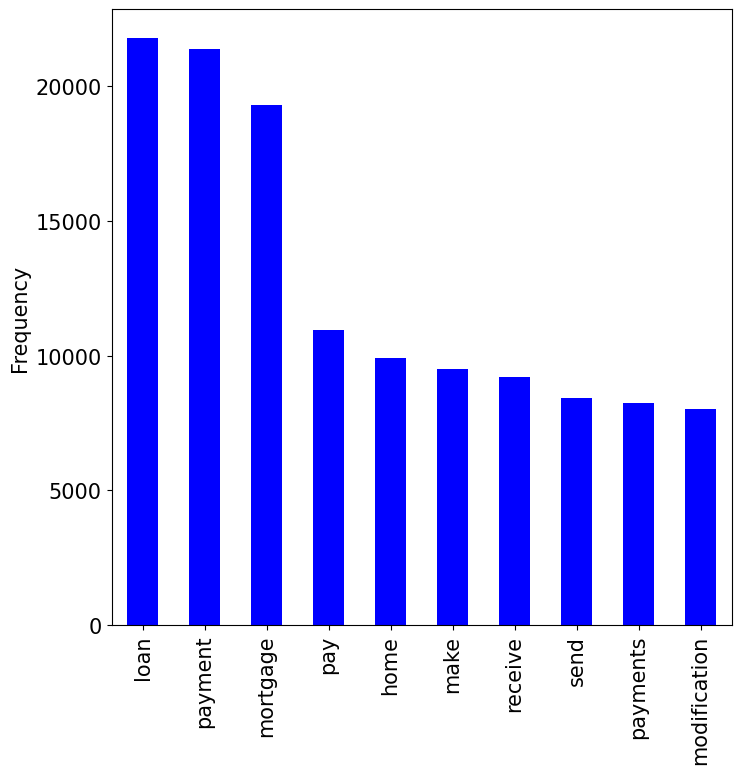

In [21]:
TermPlot = top_terms.head(10).plot(x='term', y='freq', kind='bar', figsize=(8,8), fontsize=15, color='blue')
TermPlot.set_xlabel('')
TermPlot.set_ylabel('Frequency', fontsize=15)
TermPlot.legend_.remove()
plt.show()

# Text Mining and Topic Discovery

In [22]:
conn.loadActionSet('textmining')
actions = conn.builtins.help(actionSet='textmining')

NOTE: Added action set 'textmining'.
NOTE: Information for action set 'textmining':
NOTE:    textMining
NOTE:       tmSvd - Computes the SVD factorization and generates topics. Some parameters require a SAS Visual Text Analytics license or a SAS Visual Data Mining and Machine Learning license
NOTE:       tmMine - Combines the tpParse action, the tpAccumulate action, and SVD functionality into one action. Some parameters require a SAS Visual Text Analytics license or a SAS Visual Data Mining and Machine Learning license
NOTE:       tmScore - Generates the parent table and SVD projections from new textual data based on the results from previous training data. This action requires a SAS Visual Text Analytics license or a SAS Visual Data Mining and Machine Learning license


In [23]:
conn.textMining.tmMine(
    documents = indata,
    docid = 'docid',
    text = 'complaint',
    nounGroups = False,
    tagging = False,
    stemming = True,
    stopList = 'stoplist',
    reduce = 1,
    k = 10,
    numLabels = 10,
    topicDecision = True,
    
    # Save same tables from the tpParse Action
    parseConfig = dict(name='config', replace=True),
    parent = dict(name='parent', replace=True),
    child = dict(name='child', replace=True),
    offset = dict(name='offset', replace=True),
    terms = dict(name='terms', replace=True),
    
    # Save tables from the tmMine action
    termTopics = dict(name='term_topics', replace=True),
    wordPro = dict(name='wordpro', replace=True),
    docpro = dict(name='docpro', replace=True),
    topics = dict(name='topics', replace=True),
    u = dict(name='svdu', replace=True),
    s = dict(name='singular_vals', replace=True)
)

NOTE: Topics have been requested so the document unit normalization will not occur unless requested.


,casLib,Name,Label,Rows,Columns,casTable
0,CASUSER(christine),offset,,2408801,9,"CASTable('offset', caslib='CASUSER(christine)')"
1,CASUSER(christine),terms,,26740,11,"CASTable('terms', caslib='CASUSER(christine)')"
2,CASUSER(christine),parent,,434064,3,"CASTable('parent', caslib='CASUSER(christine)')"
3,CASUSER(christine),child,,510778,3,"CASTable('child', caslib='CASUSER(christine)')"
4,CASUSER(christine),config,,1,25,"CASTable('config', caslib='CASUSER(christine)')"
5,CASUSER(christine),term_topics,,12244,3,"CASTable('term_topics', caslib='CASUSER(christine)')"
6,CASUSER(christine),svdu,,18021,11,"CASTable('svdu', caslib='CASUSER(christine)')"
7,CASUSER(christine),singular_vals,,10,2,"CASTable('singular_vals', caslib='CASUSER(christine)')"
8,CASUSER(christine),wordpro,,18021,11,"CASTable('wordpro', caslib='CASUSER(christine)')"
9,CASUSER(christine),docpro,,10000,21,"CASTable('docpro', caslib='CASUSER(christine)')"


In [24]:
conn.table.fetch(table='topics',to=5)

,_TopicId_,_Name_,_Category_,_NumTerms_,_NumDocs_,_TermCutOff_,_DocCutOff_
0,1.0,"+escrow, +tax, +check, +shortage, +payoff, boa, +refund, +close, +analysis, +customer",Mult,1308.0,0.0,0.01,2.012
1,2.0,"+assignment, +fraud, +trust, +court, alleged, +rescission, +exhibit, sls, +title, +affidavit",Mult,1141.0,0.0,0.01,0.459
2,3.0,"green, +tree, treexxxx, auto, biweekly, +website, +misappropriate, greentree, +paycheck, mobile",Mult,999.0,55.0,0.01,0.236
3,4.0,"+lawyer, +buyer, +divorce, +realtor, +mod, +attorney, +father, +paper, +court, +sheriff",Mult,1404.0,0.0,0.01,0.334
4,5.0,"+appeal, hamp, mha, +denial, +determination, +borrower, npv, affordable, +program, dual",Mult,1274.0,0.0,0.01,0.327


# Find Similar Terms

In [25]:
conn.loadActionSet('textUtil')
actions = conn.builtins.help(actionSet='textUtil')

NOTE: Added action set 'textUtil'.
NOTE: Information for action set 'textUtil':
NOTE:    textUtil
NOTE:       tmAstore - Creates a text mining analytic store from text mining tables
NOTE:       tmFindSimilar - Computes similarity scores of terms based on singular value decomposition (SVD) projections
NOTE:       tmCooccur - Computes the term-by-term co-occurrence matrix


In [26]:
# Find the term number for the word 'loan'
termnum = conn.fedSql.execDirect(query = 
    '''
    SELECT _Termnum_ 
    FROM terms_unique
    WHERE _Term_ = 'loan';
    '''
)['Result Set']

termnum = termnum['_Termnum_'][0]
termnum

13360.0

In [27]:
# Find similar terms to the word 'loan'
conn.textUtil.tmFindSimilar(
    table = 'wordpro',
    termnum = termnum,
    num_svd = '5',
    prefix = 'col',
    casOut = dict(name='similar', replace=True)
)

conn.table.fetch(table='similar', to=5)

,_TermNum_,_Similar_
0,1.0,0.894110
1,2.0,0.980570
2,3.0,0.761417
3,4.0,0.780782
4,5.0,-0.783142


# Merge Term Numbers and Terms

In [28]:
conn.dataStep.runCode(code=
    '''
    data similar_terms (keep = Term _TermNum_ SimNum);
        merge terms_unique(IN=in1 rename=(_Term_=Term)) similar(IN=in2 rename=(_Similar_=SimNum));
        by _TermNum_;
        if (In1=1 and In2=1);
    run;
    '''
)

[InputCasTables]

                casLib          Name   Rows  Columns                                               casTable
 0  CASUSER(christine)  terms_unique  23944       11  CASTable('terms_unique', caslib='CASUSER(christine)')
 1  CASUSER(christine)       similar  18021        2       CASTable('similar', caslib='CASUSER(christine)')

[OutputCasTables]

                casLib           Name   Rows  Columns  Append Promoted                                                casTable
 0  CASUSER(christine)  similar_terms  18021        3     NaN        N  CASTable('similar_terms', caslib='CASUSER(christine)')

+ Elapsed: 0.0612s, user: 0.105s, sys: 0.0329s, mem: 5mb

In [29]:
# Find the top five most similar terms
print("Most Similar Terms")
simTerms = conn.fedSql.execDirect(query = 
    '''
    SELECT * 
    FROM similar_terms
    ORDER BY SimNum DESC;
    '''
)['Result Set']

simTerms.head()

Most Similar Terms


,Term,_Termnum_,SimNum
0,loan,13360.0,1.000000
1,day,277.0,0.999927
2,contact,4387.0,0.999903
3,glad,8753.0,0.999874
4,confuse,241.0,0.999788


# Text Mining Part II

The data set **CFPB_COMPLAINTS_CLEAN** contains the cleaned text from the original **CFPB_COMPLAINTS** data set. For the text in each complaint, stop words and non-letters have been removed, words have been stemmed, and all tokens were changed to lower case. 

| Name      | Model Role | Measurement Level | Description                                                            |
|:----------|:-----------|:------------------|:-----------------------------------------------------------------------|
| DISPUTE   | Target     | Binary            | 1 = consumer disputed company response, 0 = did not dispute            |
| COMPLAINT | Input      | Text              | consumer submitted complaint cleaned                                   |

# Cleaned Data

In [30]:
castbl = conn.read_csv("data/cfpb_complaints_clean.csv", casout = dict(name="cfpb_clean", replace=True))
indata = 'cfpb_clean'

NOTE: Cloud Analytic Services made the uploaded file available as table CFPB_CLEAN in caslib CASUSER(christine).
NOTE: The table CFPB_CLEAN has been created in caslib CASUSER(christine) from binary data uploaded to Cloud Analytic Services.


In [31]:
display(castbl.shape)
castbl.head()

(10000, 2)

,dispute,complaint
0,0.0,homeownership advisor submit sls receiv fax confirm call today check status told receiv
1,0.0,file complaint foreclos wrong famili home love ruin life wrong foreclos loan modif approv year home receiv lawsuit mortgag payment fair rite give back home wrong work hard
2,0.0,live mortgag holder bankrupt sold loan green tree prior sell heard compani result sell green tree open escrow account pay properti tax insur escrow account state requir lender maintain escrow account mortgag fix rate year mortgag month mortgag payment pay month cover escrow payment properti tax insur month statement green tree regular month payment pay rough month requir acknowledg design appli escrow account recent made payment attempt compli term loan year green tree held mortgag bill dollar year suppos escrow shortag year amount escrow shortag dollar amount insur properti tax pay annual increas justifi increas dollar year green tree annual escrow account disclosur statement convolut calcul justifi increas copi attach year day prior receiv annual escrow account disclosur statement receiv letter green tree state account current copi attach year contact green tree explain calcul understand justif explan nt pay amount shortag green tree threaten increas amount regular month payment cover shortag find hard legal mortgag compani charg borrow dollar year maintain escrow account cheaper borrow pay properti tax insur borrow properti tax insur delinqu borrow opt oner escrow arrang green tree charg peopl dollar year suppos escrow shortag requir borrow escrow account pay properti tax insur avoid financi hardship green tree creat stuck mortgag compani opportun make effort chang lender nt penal stuck compani compani voluntarili enter contract legal mortgag compani requir consum escrow account cost hundr dollar year cost paid properti tax insur nt practic legal nt investig
3,0.0,wife fha back yr servic sign file chapter bankruptci protect includ mortgag file mortgag payment arrearag servic agreement prejudic attempt refin mortgag advantag rate final found fha mortgag inform file insur claim fha mip due loan delinqu mortgag pick home loan inform loan servic told longer fha loan idea fha loanprev refin put status inform mortgag addit pay fha mip payment mortgag payment mortgag mortgag mortgag payment reduc signific drop homeown polici
4,0.0,review lender month modif request document send postpon sale date thirti day request document bank statement month confirm sale date postpon forward sale today confirm night postpon today chang tune unfair compli request fail provid option foreclosur complet lie foreclos properti


In [32]:
conn.loadActionSet('simple')
actions = conn.builtins.help(actionSet='simple')

NOTE: Added action set 'simple'.
NOTE: Information for action set 'simple':
NOTE:    simple
NOTE:       mdSummary - Calculates multidimensional summaries of numeric variables
NOTE:       numRows - Shows the number of rows in a Cloud Analytic Services table
NOTE:       summary - Generates descriptive statistics of numeric variables such as the sample mean, sample variance, sample size, sum of squares, and so on
NOTE:       correlation - Computes Pearson product-moment correlations.
NOTE:       regression - Performs a linear regression up to 3rd-order polynomials
NOTE:       crossTab - Performs one-way or two-way tabulations
NOTE:       distinct - Computes the distinct number of values of the variables in the variable list
NOTE:       topK - Returns the top-K and bottom-K distinct values of each variable included in the variable list based on a user-specified ranking order
NOTE:       groupBy - Builds BY groups in terms of the variable value combinations given the variables in the variab

In [33]:
conn.simple.freq(
    table = indata,
    inputs = "dispute"
)

,Column,NumVar,FmtVar,Level,Frequency
0,dispute,0.0,0,1,5018.0
1,dispute,1.0,1,2,4982.0


# Partition the Data

In [34]:
conn.loadActionSet('sampling')
actions = conn.builtins.help(actionSet='sampling')

NOTE: Added action set 'sampling'.
NOTE: Information for action set 'sampling':
NOTE:    sampling
NOTE:       srs -  Samples a proportion of data from the input table or partitions the data into no more than three portions
NOTE:       stratified - Samples a proportion of data or partitions the data into no more than three portions within each stratum
NOTE:       oversample - Samples a user-specified proportion of data from the event level and adjusts the ratio between rare events and non-rare events to a user-specified ratio
NOTE:       kfold - K-fold partitioning.


In [35]:
conn.sampling.srs(
    table   = indata,
    samppct = 80,
    samppct2 = 10,
    seed = 802,
    partind = True,
    output  = dict(casOut = dict(name = indata, replace = True), 
      copyVars = 'ALL')
)

NOTE: Simple Random Sampling is in effect.
NOTE: Using SEED=802 for sampling.


[SRSFreq]

 Frequencies
 
     NObs  NSamp1  NSamp2
 0  10000    8000    1000

[OutputCasTables]

                casLib        Name Label   Rows  Columns                                             casTable
 0  CASUSER(christine)  cfpb_clean        10000        3  CASTable('cfpb_clean', caslib='CASUSER(christine)')

+ Elapsed: 0.0308s, user: 0.0284s, sys: 0.0109s, mem: 25.7mb

In [36]:
conn.simple.freq(
    table = indata,
    inputs = '_PartInd_'
)

,Column,NumVar,FmtVar,Level,Frequency
0,_PartInd_,0.0,0,1,1000.0
1,_PartInd_,1.0,1,2,8000.0
2,_PartInd_,2.0,2,3,1000.0


# Shuffle the Data

In [37]:
conn.table.shuffle(
    table = indata,
    casOut = dict(name=indata, replace=True)
)

[caslib]

 'CASUSER(christine)'

[tableName]

 'CFPB_CLEAN'

[casTable]

 CASTable('CFPB_CLEAN', caslib='CASUSER(christine)')

+ Elapsed: 0.0298s, user: 0.0103s, sys: 0.0266s, mem: 21.3mb

# Load Word Embeddings

The data set **CFPB_COMPLAINTS_EMBED** contains the Global Vectors for Word Representation (GLOVE) for each term in the **CFPB_COMPLAINTS_CLEAN** data set. The GLOVE was created from word-word co-occurrence statistics from the **CFPB_COMPLAINTS_CLEAN** corpus using an unsupervised learning algorithm. The vectors of dimension 100 show the linear substructure of the word vector space. 

| Name       | Model Role | Measurement Level | Description                                                            |
|:-----------|:-----------|:------------------|:-----------------------------------------------------------------------|
| VOCAB.TERM | Input      | Nominal           | Individual terms from the cleaned corpus                               |
| X1-X100    | Input      | Interval          | Word representations in 100 dimensions                                 |

In [38]:
embed = conn.read_csv("data/cfpb_complaints_embed.csv", casout = dict(name="glove", replace=True))

NOTE: Cloud Analytic Services made the uploaded file available as table GLOVE in caslib CASUSER(christine).
NOTE: The table GLOVE has been created in caslib CASUSER(christine) from binary data uploaded to Cloud Analytic Services.


In [39]:
display(embed.shape)
embed.head()

(15930, 101)

,vocab.term,X1,X2,X3,X4,X5,X6,X7,X8,X9,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
0,loan,0.001794,-0.263228,-1.298899,-0.058547,0.235769,-0.217129,0.105874,-0.132022,0.246100,-0.949172,0.555701,0.887085,0.049636,0.812035,1.138523,-1.017835,0.146789,0.254112,1.113880
1,payment,-0.522696,-0.561328,-0.935466,0.121460,0.102973,-0.030521,0.091488,-0.327767,0.099885,-0.677825,1.299492,0.453393,0.700672,-0.413863,1.156502,-1.321609,-0.406128,0.110485,1.070087
2,mortgag,-0.643798,-0.202020,-1.366386,0.268033,0.431708,-0.359745,-0.491062,0.037036,-0.348524,-0.623782,0.573284,0.530984,0.232319,0.314251,1.010555,-0.729664,-0.616139,-0.198227,0.697385
3,call,-0.684729,0.430276,-0.885503,0.304203,0.205651,0.599922,0.066877,0.445255,0.001950,-0.995820,0.651191,0.203672,-0.876477,0.052819,0.690422,-0.844151,0.094625,-0.026625,1.415470
4,home,0.034450,-0.007651,-0.513413,-0.034746,0.294405,0.020659,0.193399,0.387376,-0.505388,-0.038149,0.338387,0.618084,0.205984,-0.001304,0.374112,-0.932858,-0.130848,-0.246880,0.785526


In [40]:
# Find interesting words
conn.dataStep.runCode(code=
    '''
    data embed_sample;
        set glove;
        if vocab.term in ('credit','tax','loan','debt','default',
                            'unfair','difficult','conflict','fight','harm');
    run;
    '''
)

[InputCasTables]

                casLib   Name   Rows  Columns                                        casTable
 0  CASUSER(christine)  glove  15930      101  CASTable('glove', caslib='CASUSER(christine)')

[OutputCasTables]

                casLib          Name  Rows  Columns  Append Promoted                                               casTable
 0  CASUSER(christine)  embed_sample    10      101     NaN        N  CASTable('embed_sample', caslib='CASUSER(christine)')

+ Elapsed: 0.0143s, user: 0.0232s, sys: 0.0154s, mem: 5.14mb

# View Word Representations

,vocab.term,X1,X2
0,loan,0.001794,-0.263228
1,credit,-0.685837,-0.175707
2,tax,-1.099641,0.423443
3,debt,0.612719,0.621408
4,default,-0.432503,0.288474
5,unfair,-0.370005,0.287504
6,difficult,-0.032552,-0.204329
7,fight,0.147895,0.273340
8,harm,-0.114465,-0.544171
9,conflict,-0.482043,-0.433294


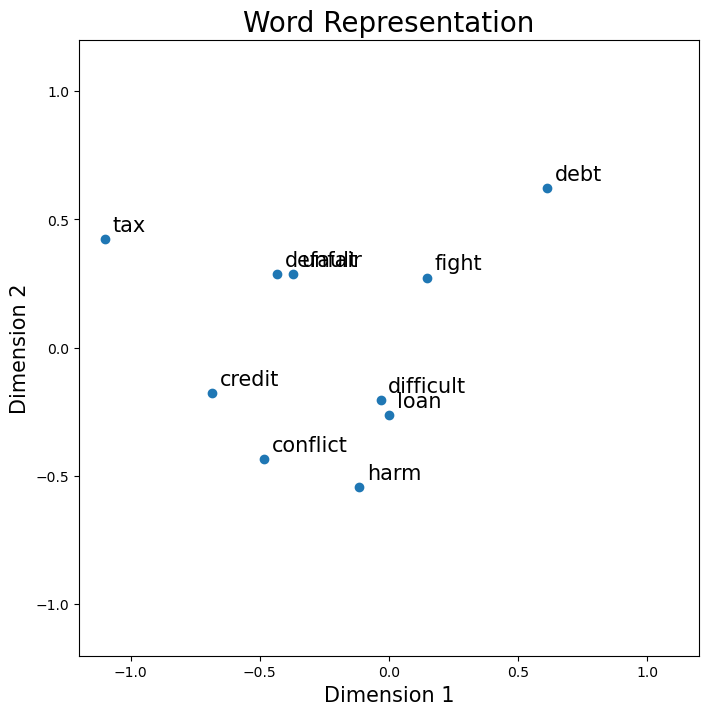

In [41]:
# Bring word embedding sample locally
embed_sample = conn.CASTable(name='embed_sample')
embed10 = embed_sample.to_frame()
display(embed10[['vocab.term','X1','X2']])

# Plot word representations
plt.figure(figsize=(8,8))
plt.scatter(embed10['X1'], embed10['X2'])
plt.title('Word Representation', fontsize=20)
plt.xlabel('Dimension 1', fontsize=15)
plt.ylabel('Dimension 2', fontsize=15)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
for i in range(10):
    plt.text(embed10['X1'][i]+.03,embed10['X2'][i]+.03,embed10['vocab.term'][i], fontsize=15)
plt.show()

# Build the Model

In [42]:
conn.loadActionSet('deepLearn')
actions = conn.builtins.help(actionSet='deepLearn')

NOTE: Added action set 'deepLearn'.
NOTE: Information for action set 'deepLearn':
NOTE:    deepLearn
NOTE:       buildModel - Creates an empty Deep Learning model
NOTE:       addLayer - Adds a layer to a Deep Learning model
NOTE:       removeLayer - Removes a layer from a Deep Learning model
NOTE:       dlPrune - Prunes a layer in a Deep Learning model
NOTE:       modelInfo - Displays model information
NOTE:       dlTune - Tunes hyperparameters for Deep Learning model
NOTE:       dlTrain - Trains a Deep Learning model
NOTE:       dlScore - Scores a table using a Deep Learning model
NOTE:       dlExportModel - Exports a Deep Learning model
NOTE:       dlLabelTarget - Assigns the target label information
NOTE:       dlImportModelWeights - Imports model weights from an external source
NOTE:       dlJoin - Joins the data table and the annotation table


## Recurrent Neural Network

In [43]:
conn.deepLearn.buildModel(
    model = dict(name='rnn',replace=True),
    type = 'RNN'
)

conn.deepLearn.addLayer(
    model = 'rnn',
    layer = dict(type='input'),
    replace=True,
    name = 'data'
)

conn.deepLearn.addLayer(
    model = 'rnn',
    layer = dict(type='recurrent', n=30, act='sigmoid', init='xavier', rnnType='rnn', outputType='samelength'),
    srcLayers = 'data',
    replace=True,
    name = 'rnn1'
)

conn.deepLearn.addLayer(
    model = 'rnn',
    layer = dict(type='recurrent', n=30, act='sigmoid', init='xavier', rnnType='rnn', outputType='encoding'),
    srcLayers = 'rnn1',
    replace=True,
    name = 'rnn2'
)

conn.deepLearn.addLayer(
    model = 'rnn',
    layer = dict(type='output', act='auto', init='xavier', error='auto'),
    srcLayers = 'rnn2',
    replace=True,
    name = 'output'
)

conn.deepLearn.modelInfo(
    model='rnn'
)

,Descr,Value
0,Model Name,rnn
1,Model Type,Recurrent Neural Network
2,Number of Layers,4
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,0
6,Number of Pooling Layers,0
7,Number of Fully Connected Layers,0
8,Number of Recurrent Layers,2


In [44]:
conn.deepLearn.dlTrain(
    table    = dict(name = indata, where = '_PartInd_ = 1'),
    validTable = dict(name = indata, where = '_PartInd_ = 2'),
    target = 'dispute',
    inputs = 'complaint',
    texts = 'complaint',
    textParms = dict(initInputEmbeddings=dict(name='glove')),
    nominals = 'dispute',
    seed = '649',
    modelTable = 'rnn',
    modelWeights = dict(name='rnn_trained_weights', replace=True),
    optimizer = dict(miniBatchSize=100, maxEpochs=20, 
                     algorithm=dict(method='adam', beta1=0.9, beta2=0.999, 
                                    learningRate=0.001, clipGradMax=100, clipGradMin=-100))
)

,Descr,Value
0,Model Name,rnn
1,Model Type,Recurrent Neural Network
2,Number of Layers,4
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,0
6,Number of Pooling Layers,0
7,Number of Fully Connected Layers,0
8,Number of Recurrent Layers,2
9,Number of Weight Parameters,5760


In [45]:
conn.deepLearn.dlScore(
    table    = dict(name = indata, where = '_PartInd_ = 0'),
    model = 'rnn',
    initWeights = 'rnn_trained_weights',
    copyVars = 'dispute',
    textParms = dict(initInputEmbeddings=dict(name='glove')),
    casout = dict(name='rnn_scored', replace=True)
)

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read          1000
 1  Number of Observations Used          1000
 2  Misclassification Error (%)          47.7
 3                   Loss Error      0.692364

[OutputCasTables]

                casLib        Name  Rows  Columns                                             casTable
 0  CASUSER(christine)  rnn_scored  1000        6  CASTable('rnn_scored', caslib='CASUSER(christine)')

+ Elapsed: 0.78s, user: 1.43s, sys: 0.129s, mem: 58.9mb

## Gated Recurrent Unit Neural Network

In [46]:
conn.deepLearn.buildModel(
    model = dict(name='gru', replace=True),
    type = 'RNN'
)

conn.deepLearn.addLayer(
    model = 'gru',
    layer = dict(type='input'),
    replace=True,
    name = 'data'
)

conn.deepLearn.addLayer(
    model = 'gru',
    layer = dict(type='recurrent', n=15, act='auto', init='xavier', rnnType='gru', outputType='samelength'),
    srcLayers = 'data',
    replace=True,
    name = 'rnn1'
)

conn.deepLearn.addLayer(
    model = 'gru',
    layer = dict(type='recurrent', n=15, act='auto', init='xavier', rnnType='gru', outputType='encoding'),
    srcLayers = 'rnn1',
    replace=True,
    name = 'rnn2'
)

conn.deepLearn.addLayer(
    model = 'gru',
    layer = dict(type='output', act='auto', init='xavier', error='auto'),
    srcLayers = 'rnn2',
    replace=True,
    name = 'output'
)

conn.deepLearn.modelInfo(
    model='gru'
)

,Descr,Value
0,Model Name,gru
1,Model Type,Recurrent Neural Network
2,Number of Layers,4
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,0
6,Number of Pooling Layers,0
7,Number of Fully Connected Layers,0
8,Number of Recurrent Layers,2


In [47]:
conn.deepLearn.dlTrain(
    table    = dict(name = indata, where = '_PartInd_ = 1'),
    validTable = dict(name = indata, where = '_PartInd_ = 2'),
    target = 'dispute',
    inputs = 'complaint',
    texts = 'complaint',
    textParms = dict(initInputEmbeddings=dict(name='glove')),
    nominals = 'dispute',
    seed = '649',
    modelTable = 'gru',
    modelWeights = dict(name='gru_trained_weights', replace=True),
    optimizer = dict(miniBatchSize=100, maxEpochs=20, 
                     algorithm=dict(method='adam', beta1=0.9, beta2=0.999,
                                    learningRate=0.001, clipGradMax=100, clipGradMin=-100))
)

,Descr,Value
0,Model Name,gru
1,Model Type,Recurrent Neural Network
2,Number of Layers,4
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,0
6,Number of Pooling Layers,0
7,Number of Fully Connected Layers,0
8,Number of Recurrent Layers,2
9,Number of Weight Parameters,6555


In [48]:
conn.deepLearn.dlScore(
    table    = dict(name = indata, where = '_PartInd_ = 0'),
    model = 'gru',
    initWeights = 'gru_trained_weights',
    copyVars = 'dispute',
    textParms = dict(initInputEmbeddings=dict(name='glove')),
    casout = dict(name='gru_scored', replace=True)
)

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read          1000
 1  Number of Observations Used          1000
 2  Misclassification Error (%)          40.2
 3                   Loss Error      0.670211

[OutputCasTables]

                casLib        Name  Rows  Columns                                             casTable
 0  CASUSER(christine)  gru_scored  1000        6  CASTable('gru_scored', caslib='CASUSER(christine)')

+ Elapsed: 0.806s, user: 1.47s, sys: 0.12s, mem: 56mb

# Analyze Results Locally

In [49]:
conn.table.fetch(table='gru_scored', to=5)['Fetch']

,dispute,_DL_P0_,_DL_P1_,_DL_PredName_,_DL_PredP_,_DL_PredLevel_
0,0.0,0.488127,0.511873,0,0.511873,1.0
1,0.0,0.373639,0.626361,0,0.626361,1.0
2,0.0,0.372491,0.627509,0,0.627509,1.0
3,0.0,0.314112,0.685888,0,0.685888,1.0
4,0.0,0.495729,0.504271,0,0.504271,1.0


In [50]:
# Bring results to the client
gru_scored = conn.CASTable(name='gru_scored')
df = gru_scored.to_frame()

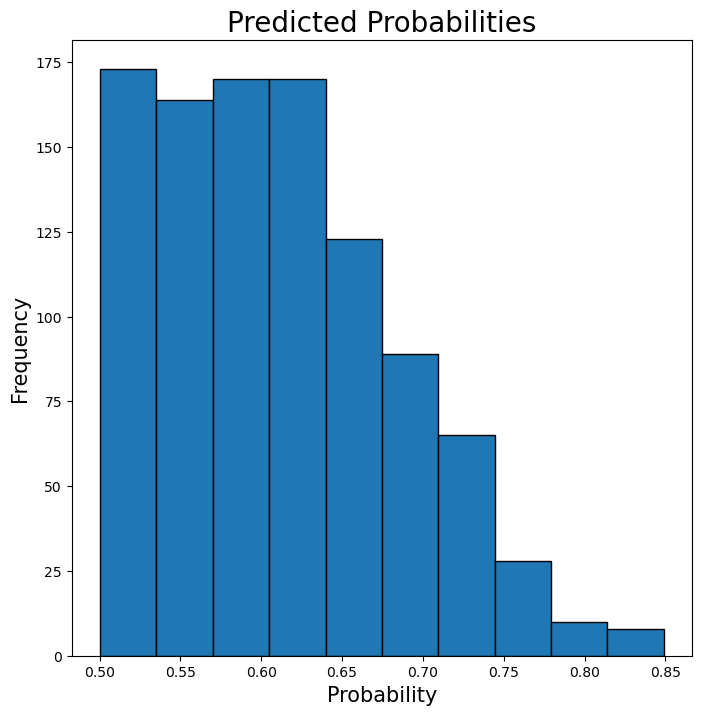

In [51]:
# Plot histogram of predictions
plt.figure(figsize=(8,8))
plt.hist(df['_DL_PredP_'], histtype='bar', ec='black')
plt.title('Predicted Probabilities', fontsize=20)
plt.xlabel('Probability', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [52]:
# Find rate of events and non-events
events = conn.simple.freq(
    table = dict(name = indata, where = '_PartInd_ = 0'),
    inputs = "dispute"
)['Frequency']

display(events)
print('Rate of Non-Events = ' + str(round(events['Frequency'][0]/events['Frequency'].sum(),4)))

,Column,NumVar,FmtVar,Level,Frequency
0,dispute,0.0,0,1,498.0
1,dispute,1.0,1,2,502.0


Rate of Non-Events = 0.498


In [53]:
# Find misclassification rate using confusion matrix
crosstab = conn.simple.crossTab(
    table = 'gru_scored',
    row = 'dispute', col = '_DL_PredName_'
)['Crosstab']

display(crosstab)
crosstab = crosstab.drop('dispute', axis=1)
print('Misclassification Rate = ' + str(round(1-pd.DataFrame(np.diagonal(crosstab)).sum(axis=0) /crosstab.values.sum(),4)[0]))

# Find conditional probabilities
print('Predict Negative | Negative = ' + str(round(crosstab.divide(crosstab.sum(axis=1), axis=0)['Col1'][0],4)))
print('Predict Positive | Positive = ' + str(round(crosstab.divide(crosstab.sum(axis=1), axis=0)['Col2'][1],4)))

,dispute,Col1,Col2
0,0,336.0,162.0
1,1,240.0,262.0


Misclassification Rate = 0.402
Predict Negative | Negative = 0.6747
Predict Positive | Positive = 0.5219


# Compare ROC Curves

In [54]:
conn.loadActionSet('percentile')
actions = conn.builtins.help(actionSet='percentile')

NOTE: Added action set 'percentile'.
NOTE: Information for action set 'percentile':
NOTE:    percentile
NOTE:       percentile - Calculate quantiles and percentiles
NOTE:       boxPlot - Calculate quantiles, high and low whiskers, and outliers
NOTE:       assess - Assess and compare models


In [55]:
conn.percentile.assess(
   table = "gru_scored",
   inputs = '_DL_P0_',
   casout = dict(name="gru_assess", replace=True),
   response = 'dispute',
   event = "1"
)

conn.percentile.assess(
   table = "rnn_scored",
   inputs = '_DL_P0_',
   casout = dict(name="rnn_assess", replace=True),
   response = 'dispute',
   event = "1"
)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(christine),rnn_assess,20,21,"CASTable('rnn_assess', caslib='CASUSER(christine)')"
1,CASUSER(christine),rnn_assess_ROC,100,22,"CASTable('rnn_assess_ROC', caslib='CASUSER(christine)')"


# Bring ROC Data Locally

In [56]:
gru_assess = conn.CASTable(name = "gru_assess_ROC")
gru_assess = gru_assess.to_frame()
gru_assess['Model'] = "GRU"

rnn_assess = conn.CASTable(name = "rnn_assess_ROC")
rnn_assess = rnn_assess.to_frame()
rnn_assess['Model'] = "RNN"

df_assess = pd.DataFrame()
df_assess = pd.concat([gru_assess, rnn_assess])

# Confusion Matrix

In [57]:
cutoff_index = round(df_assess['_Cutoff_'],2)==0.5
compare = df_assess[cutoff_index].reset_index(drop=True)
compare[['Model','_TP_','_FP_','_FN_','_TN_']]

,Model,_TP_,_FP_,_FN_,_TN_
0,GRU,262.0,162.0,240.0,336.0
1,RNN,181.0,156.0,321.0,342.0


# ROC Curve

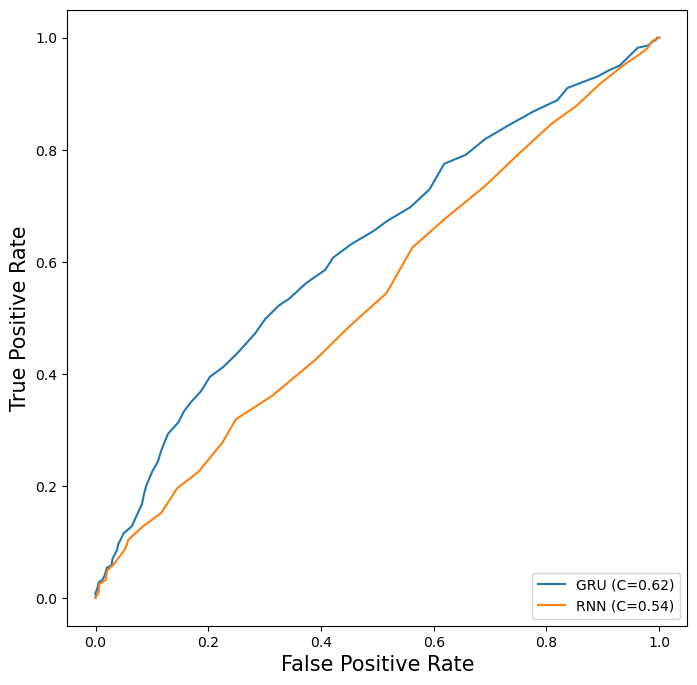

In [58]:
plt.figure(figsize=(8,8))
plt.plot()
models = list(df_assess.Model.unique())

for X in models:
    tmp = df_assess[df_assess['Model']==X]
    plt.plot(tmp['_FPR_'],tmp['_Sensitivity_'], label=X+' (C=%0.2f)'%tmp['_C_'].mean())

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(loc='lower right')
plt.show()

# End the Session

In [59]:
conn.session.endSession()

+ Elapsed: 0.00226s, user: 0.000341s, sys: 9e-06s, mem: 0.22mb